In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Reading file 
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Exploratory Data Analysis 

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Note:
- PassengerID and Name has all unique entires. We will drop these columns at the time of Data Cleaning.
- Ticket has more than 75% of unique entries. Therefore we will also drop this column.

In [7]:
for i in train.columns:
    if i == 'PassengerId' or i == 'Name' or i == 'Ticket':
        continue
    else:
        print(i,train[i].nunique())
        print('------------------------------------------')
        print(train[i].unique())
        print('===================================================================')
        

Survived 2
------------------------------------------
[0 1]
Pclass 3
------------------------------------------
[3 1 2]
Sex 2
------------------------------------------
['male' 'female']
Age 88
------------------------------------------
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
SibSp 7
------------------------------------------
[1 0 3 4 2 5 8]
Parch 7
------------------------------------------
[0 1 2 5 3 4 6]
Fare 248
------------------------------------------
[  7.25    71.2833   7.925   53.1      8.05     

In [8]:
# Finding null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Note:
- Age, Cabin and Embarked has null values
- Cabin has more than 50% of null values therefore we will drop the column at the time of DATA CLEANING
- Embarked has only 2 missing values

# Univariate Analysis 

In [9]:
categorical_columns = ['Survived', 'Pclass','Sex','SibSp','Parch', 'Embarked']

In [10]:
categorical_columns

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

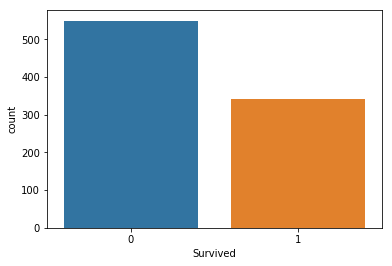

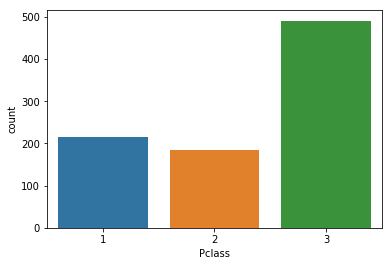

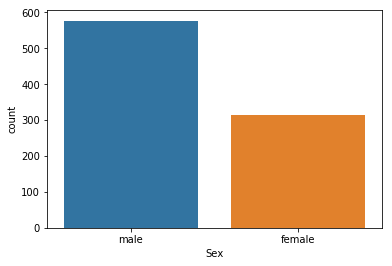

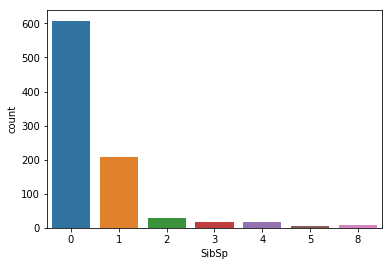

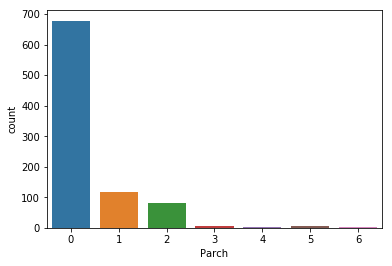

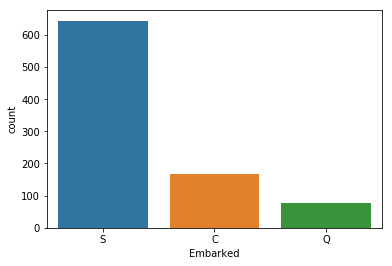

In [11]:
# On Categorical Column
for i in categorical_columns:
    sb.countplot(train[i])
    plt.show()
    

### Note:
1. Class 3 has most no. of people on board.
2. No. of Males were more compared to no. of Female
3. Person with no siblings are more 
4. Person with no parents and children are more.
5. Most of people embarked from S i.e. Southampton

In [12]:
numerical_columns = ['Age','Fare']

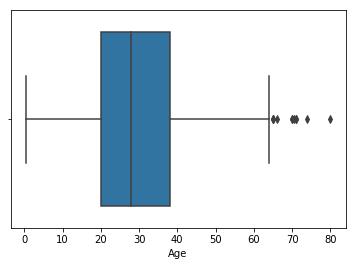

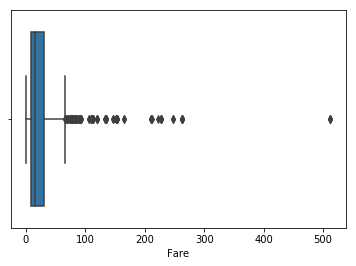

In [13]:
# Univariate analysis on Numerical Column
for i in numerical_columns:
    sb.boxplot(train[i])
    plt.show()

### Note:
- Age and Fare both have Outliers


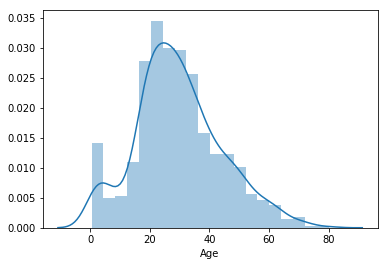

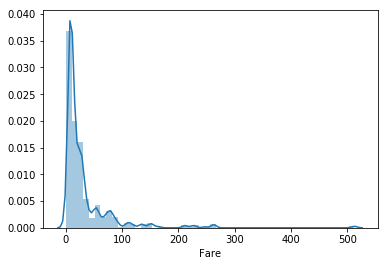

In [14]:
for i in numerical_columns:
    sb.distplot(train[i].dropna())
    plt.show()

### Note: 
- Age is almost uniformly distributed
- Fare is unvenly distributed. Its start from 0 and goes as high as 500

In [15]:
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

# Bivariate Analysis

In [16]:
# Correlation
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


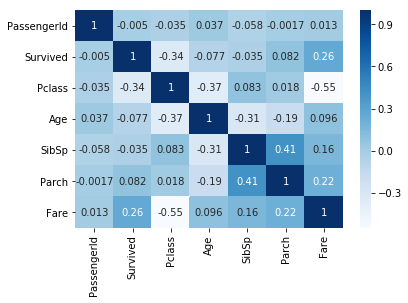

In [17]:
sb.heatmap(train.corr(),annot=True,cmap="Blues")

## Comparing all other columns with Survived Column 

In [18]:
for i in categorical_columns:
    if i == "Survived":
        continue
    else:
        print(i)
        print(train.groupby(['Survived'])[i].value_counts(normalize=True))
        print('=================================')
    

Pclass
Survived  Pclass
0         3         0.677596
          2         0.176685
          1         0.145719
1         1         0.397661
          3         0.347953
          2         0.254386
Name: Pclass, dtype: float64
Sex
Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: Sex, dtype: float64
SibSp
Survived  SibSp
0         0        0.724954
          1        0.176685
          2        0.027322
          4        0.027322
          3        0.021858
          8        0.012750
          5        0.009107
1         0        0.614035
          1        0.327485
          2        0.038012
          3        0.011696
          4        0.008772
Name: SibSp, dtype: float64
Parch
Survived  Parch
0         0        0.810565
          1        0.096539
          2        0.072860
          4        0.007286
          5        0.007286
          3        0.003643
          6        0.001821
1     

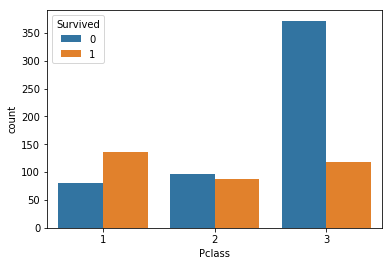

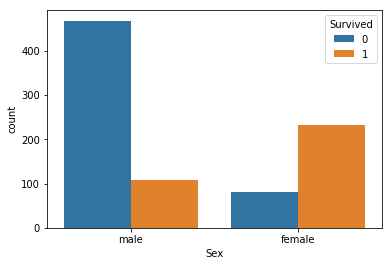

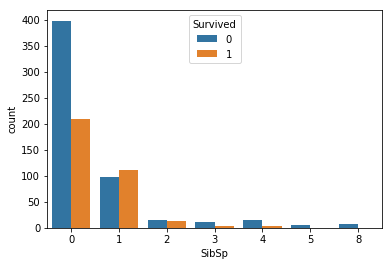

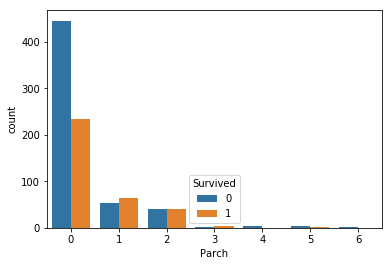

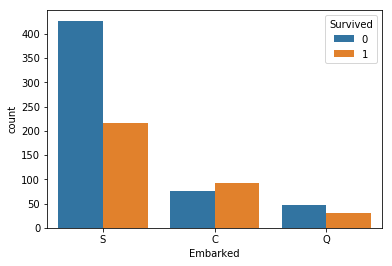

In [19]:
# Checking same visually
for i in categorical_columns:
    if i == "Survived":
        continue
    else:
        sb.countplot(x=i, hue="Survived", data=train)
        plt.show()

### Note: 
### Most Deaths in each columns
1. PClass - Class 3
2. Sex - Male
3. Sib - 0 siblings
4. Parch - 0
5. Embarked - From S

### Most Survived
1. PClass - Class 1
2. Sex - Female
3. Sib - 0 sibling
4. Parch - 0
5. Embarked - S

### Inferences:
- Class 3 has most no. of deaths and class 1 has most no. of survivors
- Male has most death and Female has survived the most
- Most of the people who has come on boards have come alone
- Majority of people has boarded/embarked the vessel from S i.e. Southampton

# Data Cleaning 

In [20]:
# Droping Name, Age , Cabin & Ticket Columns

In [21]:
train.drop(['Name','PassengerId','Ticket','Cabin'],axis =1,inplace=True)

In [22]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [23]:
# Changing Sex columns category to numerical. Male : 0 and Female : 1 

In [24]:
train['Sex'] = train['Sex'].map({'male':0,'female':1})

In [25]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C


In [26]:
# Age Column has null values

In [27]:
train[train['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,0,NaN,0,0,8.4583,Q
17,1,2,0,NaN,0,0,13.0000,S
19,1,3,1,NaN,0,0,7.2250,C
26,0,3,0,NaN,0,0,7.2250,C
28,1,3,1,NaN,0,0,7.8792,Q
29,0,3,0,NaN,0,0,7.8958,S
31,1,1,1,NaN,1,0,146.5208,C
32,1,3,1,NaN,0,0,7.7500,Q
36,1,3,0,NaN,0,0,7.2292,C
42,0,3,0,NaN,0,0,7.8958,C


In [28]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [29]:
# Filling null values with the mean of each PClass
train['Age'] = train.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

In [30]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [31]:
# Changing age columns into category as 
# Age < 17 - Children => 0
# 18 < Age < 59 - Adult => 1
# Age > 60 - Elder => 2

In [32]:
train['Age'] = train['Age'].astype(int)

In [33]:
train['Age'].nunique()

71

In [34]:
train['Age'] = train['Age'].astype(int)

train.loc[ train['Age'] <= 18, 'Age'] = 0
train.loc[(train['Age'] > 18) & (train['Age'] <= 60), 'Age'] = 1
train.loc[(train['Age'] > 60), 'Age'] = 2

In [35]:
train['Age'].unique()

array([1, 0, 2], dtype=int64)

In [36]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,1,1,0,71.2833,C


In [37]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [38]:
# Since Column Sin Sp and PArch defines Family on board in 2 differnt ways( Sibsp - Siblings or Spouse & Parch - Parent or Children)
# Instead of having two columns Parch & SibSp, we will merge two column as Family
# ,

In [39]:
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,1,1,0,71.2833,C,1


In [41]:
# Dropping SibSp and Parch Column

In [42]:
train.drop(['SibSp','Parch'],axis=1,inplace = True)

In [43]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,1,7.2500,S,1
1,1,1,1,1,71.2833,C,1


In [44]:
# Fare 

In [45]:
train['Fare'].min()

0.0

In [46]:
train['Fare'].max()

512.3292

In [47]:
train['Fare'].isna().sum()

0

In [48]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [49]:
train.groupby('Pclass')['Fare'].nlargest(5)

Pclass     
1       258    512.3292
        679    512.3292
        737    512.3292
        27     263.0000
        88     263.0000
2       72      73.5000
        120     73.5000
        385     73.5000
        655     73.5000
        665     73.5000
3       159     69.5500
        180     69.5500
        201     69.5500
        324     69.5500
        792     69.5500
Name: Fare, dtype: float64

In [50]:
train.groupby('Pclass')['Fare'].nsmallest(10)

Pclass     
1       263     0.0000
        633     0.0000
        806     0.0000
        815     0.0000
        822     0.0000
        872     5.0000
        662    25.5875
        168    25.9250
        796    25.9292
        862    25.9292
2       277     0.0000
        413     0.0000
        466     0.0000
        481     0.0000
        674     0.0000
        732     0.0000
        33     10.5000
        56     10.5000
        66     10.5000
        70     10.5000
3       179     0.0000
        271     0.0000
        302     0.0000
        597     0.0000
        378     4.0125
        326     6.2375
        843     6.4375
        818     6.4500
        202     6.4958
        371     6.4958
Name: Fare, dtype: float64

In [51]:
# As we can see fare is not at all constant as a person in class 3 has paid more for a seat than a person in class 1
# Therefore we will be dropping that column 

In [52]:
train.drop(['Fare'],axis=1,inplace=True)

In [53]:
train.head(2)

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,1,S,1
1,1,1,1,1,C,1


In [54]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [55]:
train.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [56]:
train['Embarked'].fillna(method = 'ffill',inplace=True)

In [57]:
train['Embarked'].isna().sum()

0

In [58]:
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1,'Q':2})

In [59]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,1,0,1
1,1,1,1,1,1,1
2,1,3,1,1,0,0
3,1,1,1,1,0,1
4,0,3,0,1,0,0


### Applying same for test data sets

In [60]:
test = pd.read_csv('test.csv')

In [61]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [62]:
test.drop(['Name','PassengerId','Ticket','Cabin'],axis =1,inplace=True)

In [63]:
# Changing Sex columns category to numerical. Male : 0 and Female : 1 

In [64]:
test['Sex'] = test['Sex'].map({'male':0,'female':1})

In [65]:
test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S


In [66]:
# Age Column has null values

In [67]:
test.groupby('Pclass')['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [68]:
# Filling null values with the mean of each PClass
test['Age'] = test.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

In [69]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [70]:
# Changing age columns into category as 
# Age < 17 - Children => 0
# 18 < Age < 59 - Adult => 1
# Age > 60 - Elder => 2

In [71]:
test['Age'] = test['Age'].astype(int)

In [72]:
test['Age'].nunique()

64

In [73]:
test['Age'] = test['Age'].astype(int)

test.loc[ test['Age'] <= 18, 'Age'] = 0
test.loc[(test['Age'] > 18) & (test['Age'] <= 60), 'Age'] = 1
test.loc[(test['Age'] > 60), 'Age'] = 2

In [74]:
test['Age'].unique()

array([1, 2, 0], dtype=int64)

In [75]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,7.8292,Q
1,3,1,1,1,0,7.0000,S
2,2,0,2,0,0,9.6875,Q
3,3,0,1,0,0,8.6625,S
4,3,1,1,1,1,12.2875,S


In [76]:
test['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [77]:
# Since Column Sin Sp and PArch defines Family on board in 2 differnt ways
# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,

In [78]:
test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0


In [79]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,0,1,0,0,7.8292,Q,0
1,3,1,1,1,0,7.0000,S,1
2,2,0,2,0,0,9.6875,Q,0
3,3,0,1,0,0,8.6625,S,0
4,3,1,1,1,1,12.2875,S,1


In [80]:
# Dropping SibSp and Parch Column

In [81]:
test.drop(['SibSp','Parch'],axis=1,inplace = True)

In [82]:
test.head(2)

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,1,7.8292,Q,0
1,3,1,1,7.0000,S,1


In [83]:
# Fare 


In [84]:
test.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [85]:
test.groupby('Pclass')['Fare'].nlargest(5)

Pclass     
1       343    512.3292
        53     263.0000
        69     263.0000
        24     262.3750
        59     262.3750
2       212     73.5000
        352     73.5000
        230     65.0000
        353     65.0000
        385     65.0000
3       188     69.5500
        342     69.5500
        360     69.5500
        365     69.5500
        39      56.4958
Name: Fare, dtype: float64

In [86]:
test.groupby('Pclass')['Fare'].nsmallest(10)

Pclass     
1       266     0.0000
        372     0.0000
        77     25.7000
        205    25.7417
        11     26.0000
        82     26.0000
        94     26.0000
        191    26.0000
        335    26.0000
        355    26.0000
2       2       9.6875
        198    10.5000
        204    10.5000
        207    10.5000
        222    10.5000
        276    10.5000
        279    10.5000
        317    10.5000
        340    10.5000
        351    10.5000
3       21      3.1708
        116     6.4375
        133     6.4375
        232     6.4958
        291     6.9500
        1       7.0000
        163     7.0000
        211     7.0500
        325     7.0500
        17      7.2250
Name: Fare, dtype: float64

In [87]:
# As we can see fare is not at all constant as a person in class 3 has paid more for a seat than a person in class 1
# Therefore we will be dropping that column 

In [88]:
test.drop(['Fare'],axis=1,inplace=True)

In [89]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [90]:
test['Embarked'].fillna(method = 'ffill',inplace=True)

In [91]:
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1,'Q':2})

In [92]:
test.head()

,Pclass,Sex,Age,Embarked,Family
0,3,0,1,2,0
1,3,1,1,0,1
2,2,0,2,2,0
3,3,0,1,0,0
4,3,1,1,0,1


# Assigning X & Y 

In [93]:
X = train.drop('Survived',axis = 1)
Y = train['Survived']

# Spliting Data into Test and Split 

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

# Fitting Models 

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve ,roc_auc_score

## i.) KNN 

In [97]:
# Importing Libraries
from sklearn.neighbors import KNeighborsClassifier

In [98]:
# Selecting the value of k ( No. of neighbors)
k_list=[i for i in range(1,20)]                       # create a list 
mis_class=[]                                      
for k in k_list:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    mis_class.append(sum(y_pred!=y_test))     

Text(0, 0.5, ' Error')

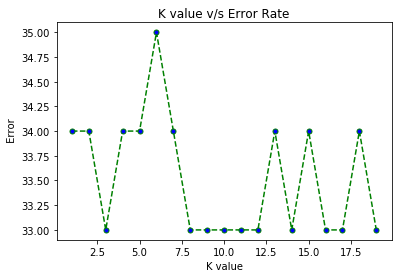

In [99]:
plt.plot(k_list,mis_class, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('K value v/s Error Rate')
plt.xlabel('K value')
plt.ylabel(' Error')

confusion matrix :
[[104   6]
 [ 28  41]]
Accuracy : 
0.8100558659217877
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.87      0.59      0.71        69

    accuracy                           0.81       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.81      0.80       179



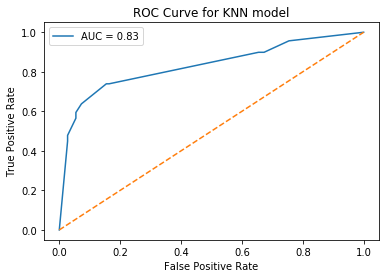

In [100]:
# Creating and Fitting Model
knn= KNeighborsClassifier(n_neighbors =8,weights='distance')
knn.fit(x_train,y_train)

# Predicting and Checking
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test,knn_pred)
knn_accuracy = accuracy_score(y_test,knn_pred)
print("confusion matrix :" ,knn_conf,sep="\n")
print("Accuracy : ",knn_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,knn_pred),sep="\n")

# ROC and AUC Curve
pred_probknn = knn.predict_proba(x_test)

auc_knn= roc_auc_score(y_test,pred_probknn[:,1])
fprkn,tprkn,thresholdskn = roc_curve(y_test,pred_probknn[:,1])
plt.plot(fprkn,tprkn,label="AUC = %.2f" %  auc_knn )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN model")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 81.01 %

2.) MisClassification (FP + FN) : 34 records

## ii) Model 2 - Logistic Regression 

In [101]:
# Importing Library
from sklearn.linear_model import LogisticRegression

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix :
[[91 19]
 [21 48]]
Accuracy : 
0.776536312849162
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.72      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

Area under the curve is 0.8615942028985508


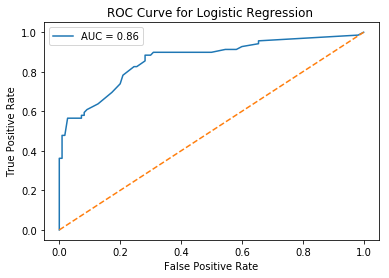

In [102]:
# Creating & Fitting Model
log=LogisticRegression()
log.fit(x_train,y_train)

# Predicting & Checking 
log_pred = log.predict(x_test)
log_conf = confusion_matrix(y_test,log_pred)
log_accuracy = accuracy_score(y_test,log_pred)
print("Confusion matrix :" ,log_conf,sep="\n")
print("Accuracy : ",log_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,log_pred),sep="\n")

# ROC & AUC Curve
pred_prob_log = log.predict_proba(x_test)

fpr,tpr,thresholds = roc_curve(y_test,pred_prob_log[:,1])
logit_roc_auc = roc_auc_score(y_test,pred_prob_log[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "AUC = %.2f" % logit_roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression ")
plt.plot([0,1],[0,1],"--")
plt.legend()

print("Area under the curve is {}".format(logit_roc_auc))

## Note: 
1.) Accuracy is 77.65 %

2.) MisClassification (FP + FN) : 40 

## iii.) Model 3 - Naive Bayes

In [103]:
# Importing Libraries
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

confusion matrix :
[[89 21]
 [17 52]]
Accuracy : 
0.7877094972067039
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       110
           1       0.71      0.75      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



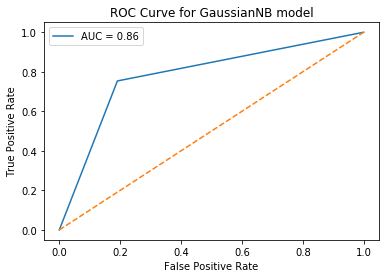

In [104]:
# Gaussian NB
# performing model fitting log transformed
gnb= GaussianNB()
gnb.fit(x_train,y_train)
gnb_predl = gnb.predict(x_test)
gnb_confl = confusion_matrix(y_test,gnb_predl)
gnb_accuracyl= accuracy_score(y_test,gnb_predl)
print("confusion matrix :" ,gnb_confl,sep="\n")
print("Accuracy : ",gnb_accuracyl,sep="\n")
print("Classification Report : ",classification_report(y_test,gnb_predl),sep="\n")

pred_probgnb = gnb.predict_proba(x_test)
auc_gnb = roc_auc_score(y_test,pred_probgnb[:,1])
fprgnb,tprgnb,thresholdsgnb = roc_curve(y_test,gnb_predl)
plt.plot(fprgnb,tprgnb,label="AUC = %.2f" %  auc_gnb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for GaussianNB model")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 78.77 %

2.) MisClassification (FP + FN) : 38

## iv.) Model 4 - Decision Tree 

In [105]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier

confusion matrix :
[[103   7]
 [ 26  43]]
Accuracy : 
0.8156424581005587
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       110
           1       0.86      0.62      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179



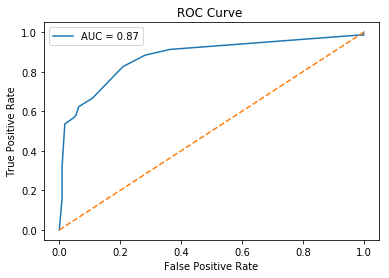

In [106]:
# Creating and Fitting Model
DT= DecisionTreeClassifier(criterion="entropy",max_depth=4)
DT.fit(x_train,y_train)

# Predicting and Checking
DT_pred = DT.predict(x_test)
DT_conf = confusion_matrix(y_test,DT_pred)
DT_accuracy = accuracy_score(y_test,DT_pred)
print("confusion matrix :" ,DT_conf,sep="\n")
print("Accuracy : ",DT_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,DT_pred),sep="\n")

# ROC and AUC Curve
pred_prob_DT = DT.predict_proba(x_test)
auc_DT = roc_auc_score(y_test,pred_prob_DT[:,1])
fprDT,tprDT,thresholdsDT = roc_curve(y_test,pred_prob_DT[:,1])
plt.plot(fprDT,tprDT,label = "AUC = %.2f" % auc_DT)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve ")
plt.plot([0,1],[0,1],"--")
plt.legend()

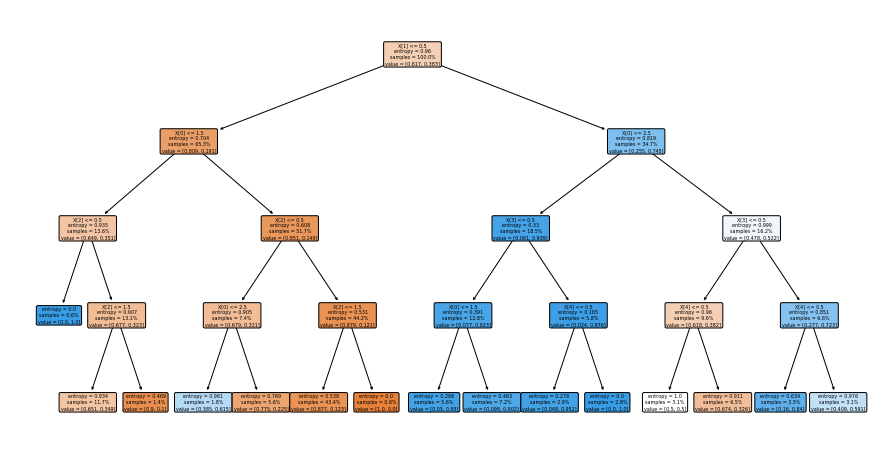

In [107]:
from sklearn import tree
plt.figure(figsize=(15,8))
tree.plot_tree(DT.fit(x_train,y_train), filled=True, precision=3, proportion=True, rounded=True)
plt.show()

## Note: 
1.) Accuracy is 81.56 %

2.) MisClassification (FP + FN) : 33

## v.) Model 5 - Random Forest 

In [108]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

confusion matrix :
[[103   7]
 [ 27  42]]
Accuracy : 
0.8100558659217877
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       110
           1       0.86      0.61      0.71        69

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.79       179
weighted avg       0.82      0.81      0.80       179



C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


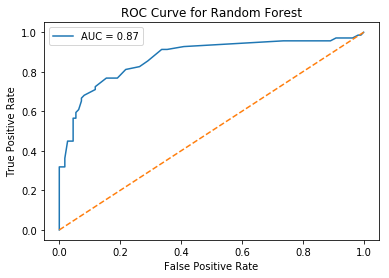

In [109]:
# Creating and Fitting Model
rf= RandomForestClassifier(criterion="entropy",max_depth=32)
rf.fit(x_train,y_train)

# Predicting and Checking
rf_pred = rf.predict(x_test)
rf_conf = confusion_matrix(y_test,rf_pred)
rf_accuracy = accuracy_score(y_test,rf_pred)
print("confusion matrix :" ,rf_conf,sep="\n")
print("Accuracy : ",rf_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,rf_pred),sep="\n")

# ROC & AUC Curve
pred_prob_rf = rf.predict_proba(x_test)
auc_rf = roc_auc_score(y_test,pred_prob_rf[:,1])
fprrf,tprrf,thresholdsrf = roc_curve(y_test,pred_prob_rf[:,1])

plt.plot(fprrf,tprrf,label = "AUC = %.2f" % auc_rf)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 80.45 %

2.) MisClassification (FP + FN) : 35   

## vi.) Model 6 - AdaBoost 

In [110]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

confusion matrix : 
[[103   7]
 [ 26  43]]
Accuracy : 
0.8156424581005587
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       110
           1       0.86      0.62      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179



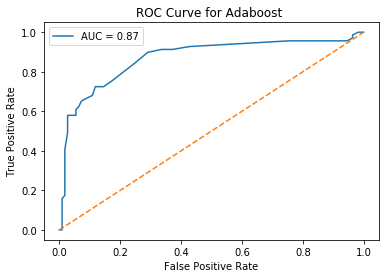

In [111]:
# Creating & Fitting Model
ab= AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=10,learning_rate=1.0,random_state=0)
ab.fit(x_train,y_train)

# Predicting and Checking
ab_pred = ab.predict(x_test)
ab_conf = confusion_matrix(y_test,ab_pred)
ab_accuracy= accuracy_score(y_test,ab_pred)
print("confusion matrix : " ,ab_conf,sep="\n")
print("Accuracy : ",ab_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,ab_pred),sep="\n")

# ROC & AUC Curve
pred_probab = ab.predict_proba(x_test)
auc_ab = roc_auc_score(y_test,pred_probab[:,1])
fprab,tprab,thresholdsab = roc_curve(y_test,pred_probab[:,1])

plt.plot(fprab,tprab,label = "AUC = %.2f" % auc_ab)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Adaboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 81.56 %

2.) MisClassification (FP + FN) : 33

## vii.) Model 7 - Gradient Boost 

In [112]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

confusion matrix :
[[103   7]
 [ 26  43]]
Accuracy : 
0.8156424581005587
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       110
           1       0.86      0.62      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179



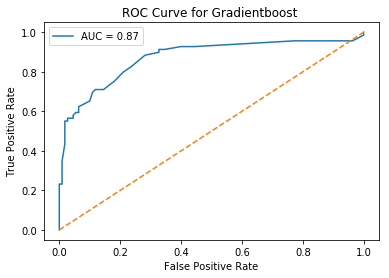

In [113]:
# Creating and Fitting Model
gb= GradientBoostingClassifier(n_estimators=10,learning_rate=0.9)
gb.fit(x_train,y_train)

# Predicting and Checking
gb_pred = gb.predict(x_test)
gb_conf = confusion_matrix(y_test,gb_pred)
gb_accuracy = accuracy_score(y_test,gb_pred)
print("confusion matrix :" ,gb_conf,sep="\n")
print("Accuracy : ",gb_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,gb_pred),sep="\n")

# ROC and AUC Curve
pred_probgb = gb.predict_proba(x_test)
auc_gb = roc_auc_score(y_test,pred_probgb[:,1])
fprgb,tprgb,thresholdsgb = roc_curve(y_test,pred_probgb[:,1])

plt.plot(fprgb,tprgb,label = "AUC = %.2f" % auc_gb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradientboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

## Note: 
1.) Accuracy is 81.56 %

2.) MisClassification (FP + FN) : 33  

## viii.) Model 8 - XG Boost 

In [114]:
# Importing Library
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

confusion matrix :
[[102   8]
 [ 26  43]]
Accuracy : 
0.8100558659217877
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.84      0.62      0.72        69

    accuracy                           0.81       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.81      0.80       179



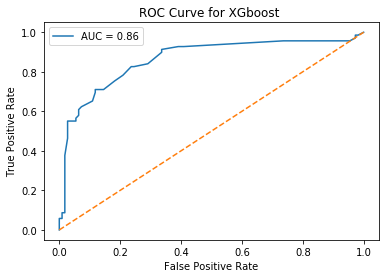

In [115]:
# Creating and Fitting Model
xgb= XGBClassifier(n_estimators=800,learning_rate=0.8)
xgb.fit(x_train,y_train)

# Predicting and Checking
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test,xgb_pred)
xgb_accuracy = accuracy_score(y_test,xgb_pred)
print("confusion matrix :" ,xgb_conf,sep="\n")
print("Accuracy : ",xgb_accuracy,sep="\n")
print("Classification Report : ",classification_report(y_test,xgb_pred),sep="\n")

# ROC & AUC Curve
pred_prob_xgb = xgb.predict_proba(x_test)
auc_xgb = roc_auc_score(y_test,pred_prob_xgb[:,1])
fprxgb,tprxgb,thresholdsxgb = roc_curve(y_test,pred_prob_xgb[:,1])

plt.plot(fprxgb,tprxgb,label = "AUC = %.2f" % auc_xgb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

### Note:
1.) Accuracy is 81.05 %

2.) MisClassification (FP + FN) : 34


# Note:
- Adaboost Model and Gradient Boost has high accuracy and less mis-classification
- We are using Gradient Boost Model for prediction of test data
- We can use either if the two for prediction

In [116]:
xgb_pred = xgb.predict(test)


# ********** 